In [188]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [189]:
df = pd.read_csv('Restaurant reviews.csv')

In [190]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [191]:
df = df.drop(df[['Metadata','Time','Pictures','7514']], axis=1)

In [192]:
df.head()

,Restaurant,Reviewer,Review,Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5


In [193]:
df['Review'].isnull().sum()

45

In [194]:
df.shape

(10000, 4)

In [195]:
df=df.dropna()

In [196]:
analyser = SentimentIntensityAnalyzer()


In [197]:
def analyse_sentiment(review):
    sentimentscore = analyser.polarity_scores(review)
    if sentimentscore['compound'] >= 0.5:  # Positive sentiment threshold
        return 'Positive'
    elif sentimentscore['compound'] <= -0.5:  # Negative sentiment threshold
        return 'Negative'
    else:
        return 'Neutral'  # Neutral sentiment if compound score is between -0.1 and 0.1


In [198]:
df['Sentiment'] = df['Review'].apply(analyse_sentiment)

In [199]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    6106
Neutral     2702
Negative    1147
Name: count, dtype: int64


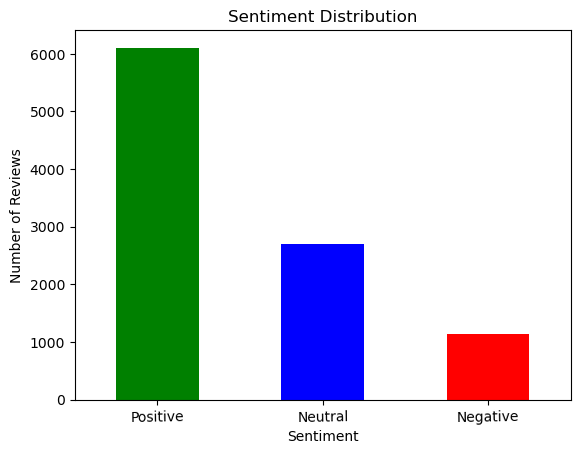

In [200]:
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', color=['Green','Blue','red'])
plt.ylabel('Number of Reviews')
plt.xticks([0,1,2],['Positive','Neutral','Negative'],rotation=1)
plt.show()


/var/folders/th/_1_xv48d6czgtmqkf45wrjq40000gp/T/ipykernel_47994/1989952011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Restaurant', y='Rating', data=top_10_restaurants, palette='Paired')


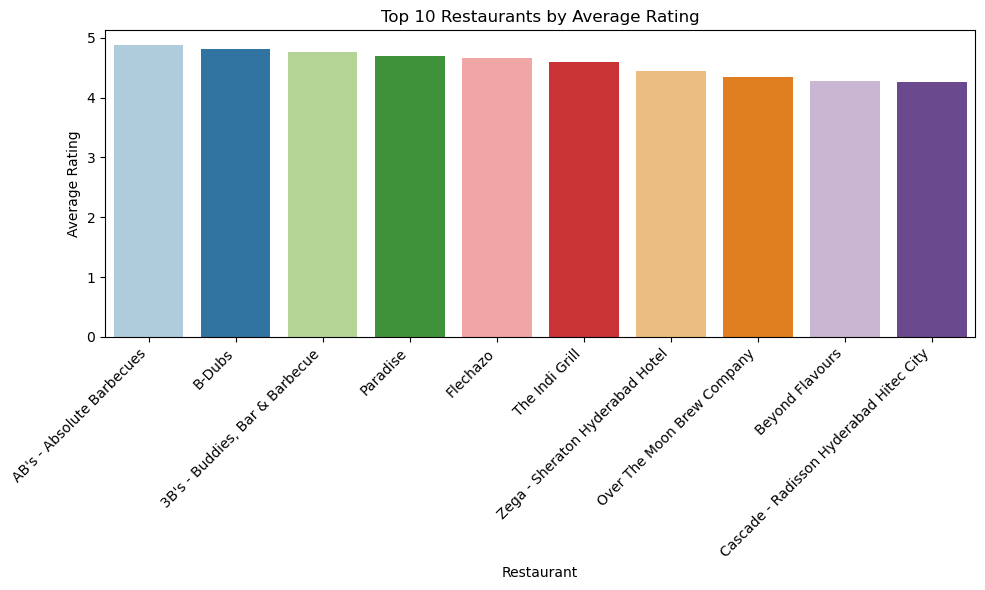

In [201]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

restaurant_avg_rating = df.groupby('Restaurant')['Rating'].mean().reset_index()

top_10_restaurants = restaurant_avg_rating.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant', y='Rating', data=top_10_restaurants, palette='Paired')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()
